<a href="https://colab.research.google.com/github/abhishek2021005/Health-Insurance-Price-Prediction/blob/main/Health_insurance(rawgithubdataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project On Health Insurance Pricing Prediction In ML**








Importing Dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [20]:
insurance = pd.read_csv("https://raw.githubusercontent.com/abhishek2021005/Health-Insurance-Price-Prediction/main/insurance.csv")


In [21]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### check if there is NULL data

In [22]:
insurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

  <!-- converting 'sex', 'smoker' and 'region' to numerical values as the regression algorithms only work with numbers so
 sex- male will be 0 and female will be 1
 smoker- if yes then 1 else 0
 region- southwest – 1 southeast – 2 northwest – 3 northeast – 4  -->

### converting 'sex', 'smoker' and 'region' to numerical values as the regression algorithms only work with numbers so
### sex- male will be 0 and female will be 1
### smoker- if yes then 1 else 0
### region- southwest – 1 southeast – 2 northwest – 3 northeast – 4

In [23]:
insurance['sex'] = insurance['sex'].apply({
     'male' : 0, 'female' : 1
}.get)
insurance['smoker'] = insurance['smoker'].apply({
     'yes' : 1, 'no' : 0
}.get)
insurance['region'] = insurance['region'].apply({
     'southwest' : 1, 'southeast' : 2,
     'northwest' : 3, 'northeast' : 4,
}.get)
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


**Coorelation between charges and age**


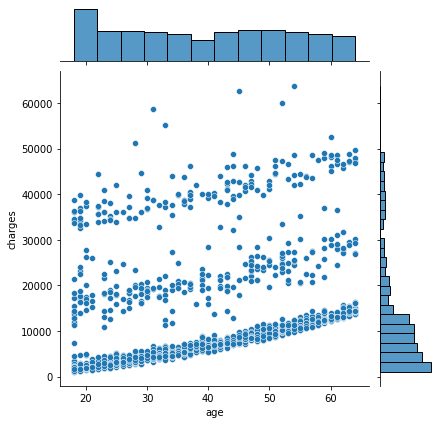

In [24]:
sns.jointplot(x=insurance['age'],y=insurance['charges'])

**Correlation between charges and smoker**


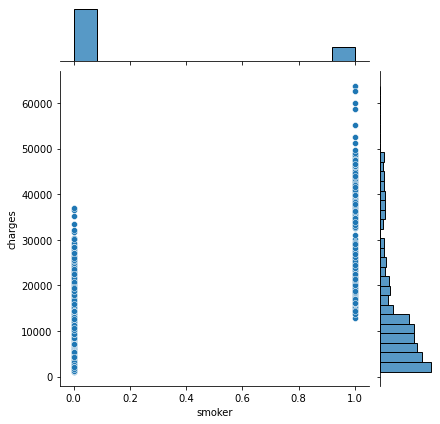

In [25]:
sns.jointplot(x=insurance['smoker'],y=insurance['charges'])

* Step 1 - The Dataset is Split Into ‘X’ Array That Contains The Features And a ‘Y’ Array With The Target Variable.

In [26]:
x = insurance[['age','sex','bmi','children','smoker','region']]
y = insurance['charges']


* Step 2 - Split The Dataset Into a Training And Testing Dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.4) 
X_train

,age,sex,bmi,children,smoker,region
1092,23,0,32.700,3,0,1
839,59,1,31.350,0,0,3
532,59,0,29.700,2,0,2
340,24,1,27.600,0,0,1
684,33,1,18.500,1,0,1
...,...,...,...,...,...,...
1260,32,1,20.520,0,0,4
444,56,0,26.695,1,1,3
220,34,1,33.700,1,0,1
1291,19,0,34.900,0,1,1


* Step 3 - Training And Testing The Model


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

* Step 4 - Prediction From The Model

In [29]:
predictions = model.predict(X_test)
predictions[0:5]

array([ 3557.50788399, 30680.05704304, 11257.53983286,  9745.55727819,
        5457.72452677])

* Step 5 - Comparing The Results

Text(0, 0.5, 'Predicted Y')

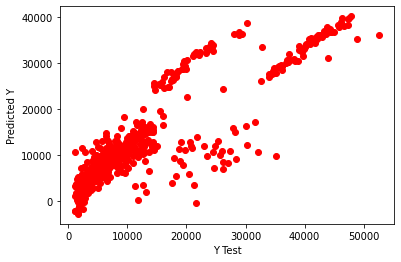

In [30]:

import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions,c="red")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

* Step 6 – Finding the regression model




Finding the regression value or **R-square value**:

In [31]:
model.fit(x,y)
model.score(x,y)

0.7507372027994937

**Coefficient and intercept values**

In [32]:
model.coef_


array([  257.28807486,   131.11057962,   332.57013224,   479.36939355,
       23820.43412267,   353.64001656])

In [33]:
model.intercept_

-13361.122967088835

* Function for returning the insurance cost :

In [34]:
def calc_insurance(age,sex,bmi,smoker,children,region):
 y = ((age * model.coef_[0]) + (sex * model.coef_[1]) + (bmi * model.coef_[2]) + (smoker * model.coef_[3]) + (children * model.coef_[4]) + (region * model.coef_[5]))
 return y

**Output prediction**

In [35]:
print(calc_insurance(20,0,75.5,0,0,2))

30962.086514572333
